In [276]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
from array import *
import pandas as pd
from sklearn.mixture import GaussianMixture
import emcee
import corner
import arviz as az

In [277]:
data = Table.read("pleiadi_817", format = "ascii")
data

<Table length=817>
   _RAJ2000   ...
   float64    ...
------------- ...
45.8693844394 ...
46.1480336919 ...
46.3612008002 ...
 46.376163428 ...
46.3784538692 ...
46.3967887284 ...
46.4208878955 ...
46.4499147713 ...
46.6362510351 ...
46.7186370503 ...
          ... ...
 66.577073247 ...
66.7616424434 ...
66.7807862636 ...
66.8226972274 ...
66.8918776608 ...
66.9705540999 ...
67.0032629918 ...
67.0506465777 ...
67.0841077824 ...
67.1659583004 ...

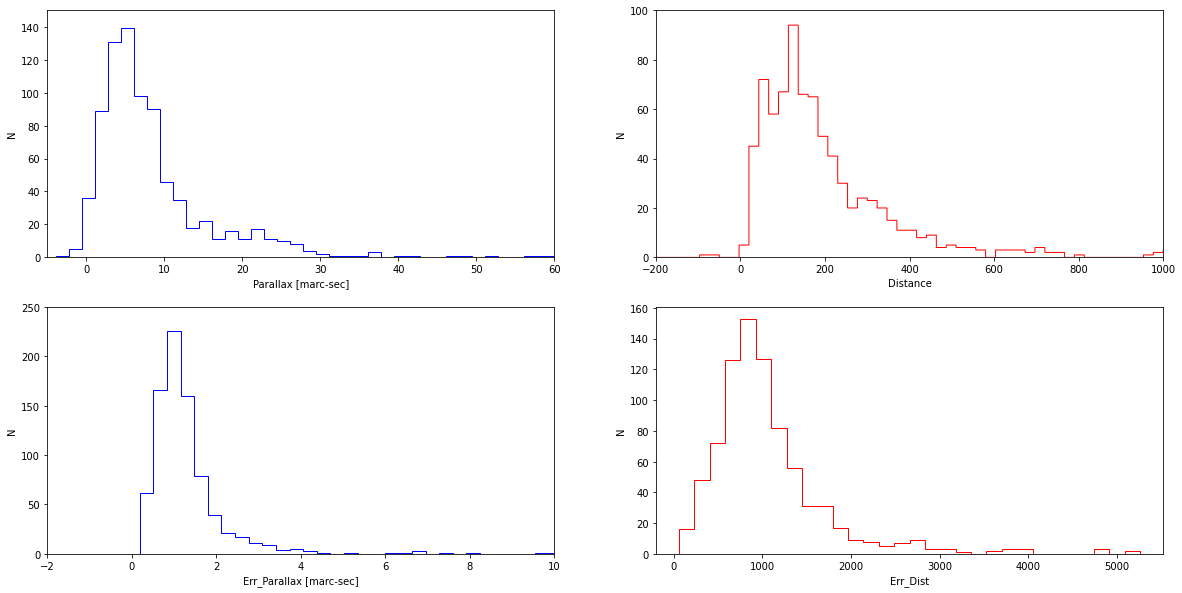

In [278]:
fig, axs = plt.subplots(2, 2, figsize=(20,10));
axs[0,0].hist(data['Plx'], bins = 50, histtype='step', color = 'blue');
axs[0,0].set_xlim(-5, 60)
axs[0,0].set_ylim(0, 150)
axs[0,0].set_xlabel("Parallax [marc-sec]")
axs[0,0].set_ylabel("N");
axs[0,1].hist(1000/data['Plx'], bins = 3000, histtype='step', color = 'red');
axs[0,1].set_xlim(-200, 1000)
axs[0,1].set_ylim(0, 100)
axs[0,1].set_xlabel("Distance")
axs[0,1].set_ylabel("N");
axs[1,0].hist(data['e_Plx'], bins = 50, histtype='step', color = 'blue');
axs[1,0].set_xlim(-2, 10)
axs[1,0].set_ylim(0, 250)
axs[1,0].set_xlabel("Err_Parallax [marc-sec]")
axs[1,0].set_ylabel("N");
axs[1,1].hist(1000/data['e_Plx'], bins = 30, histtype='step', color = 'red');
axs[1,1].set_xlabel("Err_Dist")
axs[1,1].set_ylabel("N");

In [279]:
pmRA = data['pmRA']
pmDEC = data['pmDE']
ra = data['RArad']
dec = data['DErad']
plx = data['Plx']
plx_err = data['e_Plx']

In [281]:
'''# Questa tecnica mi dice il numero atteso che dovrei mettere come numero di cluster. In questo caso la curva dove segna un minimo
#indica i numeri possibili di cluster...in questo caso 5 o 6 sembrerebbe.
z = np.zeros((len(pmRA), 2))
for i in range(len(pmRA)):
    z[i] = data['pmRA'][i], data['pmDE'][i]
n_components = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0, covariance_type='spherical', init_params='random', n_init=100).fit(z) for n in n_components]
plt.plot(n_components, [m.bic(z) for m in models], label='BIC')
plt.plot(n_components, [m.aic(z) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');'''

"# Questa tecnica mi dice il numero atteso che dovrei mettere come numero di cluster. In questo caso la curva dove segna un minimo\n#indica i numeri possibili di cluster...in questo caso 5 o 6 sembrerebbe.\nz = np.zeros((len(pmRA), 2))\nfor i in range(len(pmRA)):\n    z[i] = data['pmRA'][i], data['pmDE'][i]\nn_components = np.arange(1, 21)\nmodels = [GaussianMixture(n, random_state=0, covariance_type='spherical', init_params='random', n_init=100).fit(z) for n in n_components]\nplt.plot(n_components, [m.bic(z) for m in models], label='BIC')\nplt.plot(n_components, [m.aic(z) for m in models], label='AIC')\nplt.legend(loc='best')\nplt.xlabel('n_components');"

(-100.0, 100.0)

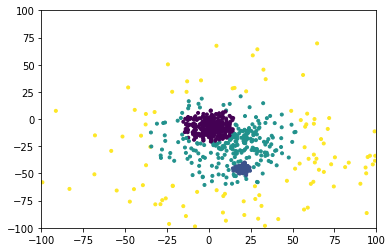

In [282]:
z = np.zeros((len(pmRA), 2))
for i in range(len(pmRA)):
    z[i] = data['pmRA'][i], data['pmDE'][i]
gm = GaussianMixture(n_components=5, random_state=0, covariance_type='spherical', init_params='random', n_init=100)
gm.fit(z)
gm.means_
labels = gm.predict(z)
plt.scatter(z[:, 0], z[:, 1], c=labels, marker='.');
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [283]:
gm.means_

array([[   1.41812878,   -7.80641928],
       [  19.82929007,  -45.34312609],
       [  12.8360411 ,  -20.65798795],
       [ 182.35166977, -234.79154097],
       [  48.38936955,  -46.47546817]])

In [284]:
gm.predict_proba(z)

array([[1.30650739e-049, 0.00000000e+000, 5.97505725e-006,
        1.61265847e-002, 9.83867440e-001],
       [7.40914215e-001, 7.26255131e-091, 2.30662529e-001,
        3.07554480e-004, 2.81157011e-002],
       [8.93707990e-001, 1.70132644e-056, 1.00533443e-001,
        5.30487436e-005, 5.70551741e-003],
       ...,
       [8.66220722e-001, 2.79532943e-051, 1.26732024e-001,
        6.47284502e-005, 6.98252549e-003],
       [5.10516313e-001, 1.76457098e-031, 4.67541959e-001,
        1.84379852e-004, 2.17573483e-002],
       [5.90995714e-027, 5.54962680e-112, 1.91956234e-002,
        9.17750516e-003, 9.71626871e-001]])

In [285]:
data['prob'] = gm.predict_proba(z)

In [286]:
prob = data['prob']
p = prob[:,1]
mask = [(p > 0.05)]
Plx_giusto = plx[tuple(mask)]

In [287]:
Plx_giusto

<Column name='Plx' dtype='float64' length=78>
 4.19
 6.06
 9.21
 4.99
 9.49
15.68
 8.51
 9.64
 6.75
  8.2
 8.19
 7.95
  ...
10.13
 5.43
 9.68
10.26
 7.18
  8.2
 6.71
 5.88
 7.76
  8.9
  7.1
 9.09

68 68 1732 1732 68 68


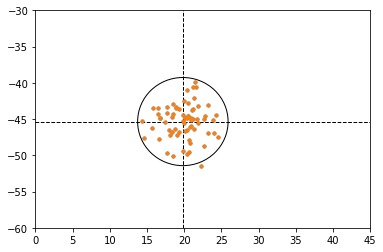

In [288]:
ppmDEC = []
ppmRA = []
pDEC = []
pRA = []
pplx = []
pplx_err = []
fig, ax = plt.subplots()
for i in range(len(labels)):
    if(labels[i] == 1):
        ppmDEC.append(pmDEC[i]) 
        ppmRA.append(pmRA[i])
        DEC.append(dec[i]) 
        RA.append(ra[i])
        pplx.append(plx[i])
        pplx_err.append(plx_err[i])
print(len(ppmDEC), len(ppmRA), len(DEC), len(RA), len(pplx), len(pplx_err))
ax.axvline( x = 19.82929007, linestyle = "--", linewidth = 1, color = "black");
ax.axhline( y = -45.34312609, linestyle = "--", linewidth = 1, color = "black");
ax.plot(ppmRA, ppmDEC, '.');
ax.plot(IpmRA, IpmDEC, '.');
ax.set_xlim(0, 45)
ax.set_ylim(-60, -30)
circle2 = plt.Circle((19.82929007,  -45.34312609), gm.covariances_[1], color='black',fill=False)
ax.add_patch(circle2)

In [289]:
gm.covariances_[1] # QUESTA è LA SIGMA

6.0794516207080305

In [290]:
gm.means_

array([[   1.41812878,   -7.80641928],
       [  19.82929007,  -45.34312609],
       [  12.8360411 ,  -20.65798795],
       [ 182.35166977, -234.79154097],
       [  48.38936955,  -46.47546817]])

In [291]:
np.array(pplx)

array([ 4.19,  6.06,  9.21,  8.51,  9.64,  6.75,  8.2 ,  7.95,  6.58,
        8.17,  6.08,  8.12,  2.98,  8.32,  7.33, 10.19,  9.19,  8.84,
        8.1 ,  6.64,  7.65,  7.27,  8.27,  7.3 ,  7.58,  9.44,  8.65,
        8.33,  8.06, 10.67, 10.57,  7.97,  7.97,  8.82, 11.04,  8.24,
        8.51,  8.77,  8.  ,  8.58,  8.58,  4.42,  7.66,  8.9 ,  8.62,
        8.09,  9.42,  9.68,  8.45,  7.87,  8.53,  8.54,  8.18,  8.3 ,
        8.72,  8.86,  6.81,  9.93,  7.65,  6.16, 10.13,  5.43,  9.68,
        7.18,  8.2 ,  6.71,  5.88,  7.1 ])

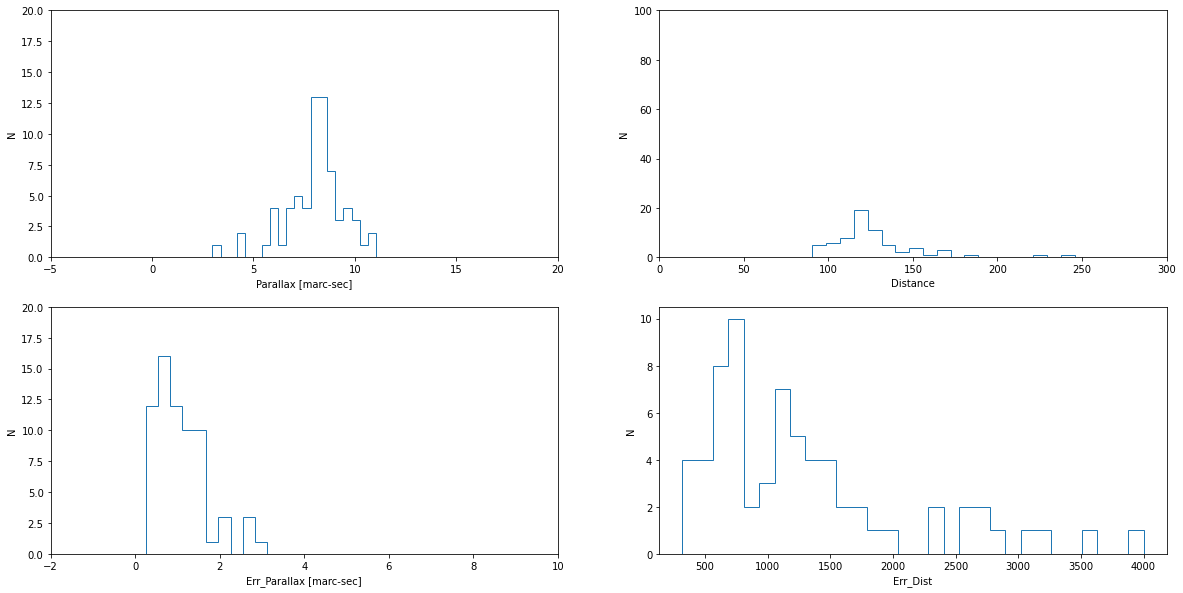

In [292]:
fig1, axs1 = plt.subplots(2, 2, figsize=(20,10));
axs1[0,0].hist(pplx, bins = 20, histtype='step');
axs1[0,0].set_xlim(-5, 20)
axs1[0,0].set_ylim(0, 20)
axs1[0,0].set_xlabel("Parallax [marc-sec]")
axs1[0,0].set_ylabel("N");
axs1[0,1].hist(1000/np.array(pplx), bins = 30, histtype='step');
axs1[0,1].set_xlim(0, 300)
axs1[0,1].set_ylim(0, 100)
axs1[0,1].set_xlabel("Distance")
axs1[0,1].set_ylabel("N");
axs1[1,0].hist(pplx_err, bins = 10, histtype='step');
axs1[1,0].set_xlim(-2, 10)
axs1[1,0].set_ylim(0, 20)
axs1[1,0].set_xlabel("Err_Parallax [marc-sec]")
axs1[1,0].set_ylabel("N");
axs1[1,1].hist(1000/np.array(pplx_err), bins = 30, histtype='step');
axs1[1,1].set_xlabel("Err_Dist")
axs1[1,1].set_ylabel("N");

In [296]:
def sum_err(e_Plx, sigma_cl):
    return e_Plx*e_Plx + sigma_cl*sigma_cl

def log_likelihood(par, Plx, e_Plx):
    Pcl, sigma_cl = par
    err = sum_err(e_Plx, sigma_cl)
    return -0.5 * np.sum( ( np.log(2*np.pi*(err)) + ( (Plx - Pcl)**2 )/(err) ))

Plc_min = 0
Pcl_max = 20 # Hipparcos
sigma_cl_min = 0
sigma_cl_max = 5

def log_prior(par):
    Pcl, sigma_cl = par
    if Pcl < Plc_min or Pcl > Pcl_max or sigma_cl < sigma_cl_min or sigma_cl > sigma_cl_max:
        return -np.inf
    else:
        return np.log((Pcl_max - Plc_min)*(sigma_cl_max - sigma_cl_min))
    
def log_posterior(par, Plx, e_Plx):
    lp = log_prior(par)
    if np.isfinite(lp):
        return lp + log_likelihood(par, Plx, e_Plx)

In [297]:
pos_iniziale = np.array([ np.random.uniform( Plc_min, Pcl_max ), np.random.uniform( sigma_cl_min, sigma_cl_max )])

In [298]:
pos_iniziale

array([4.05957892, 1.9915059 ])

In [299]:
pos = pos_iniziale + 1e-4 * np.random.randn(7, 2) 
nwalkers, ndim = pos.shape
#for i in range(len(pplx)):
    #sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(np.array(pplx[i]), np.array(pplx_err[i])))
sampler = emcee.EnsembleSampler( nwalkers, ndim, log_posterior, args=(np.array(pplx), np.array(pplx_err)) )
sampler.run_mcmc(pos, 500, progress=True);

 11%|█         | 55/500 [00:00<00:00, 629.39it/s]


TypeError: float() argument must be a string or a number, not 'NoneType'

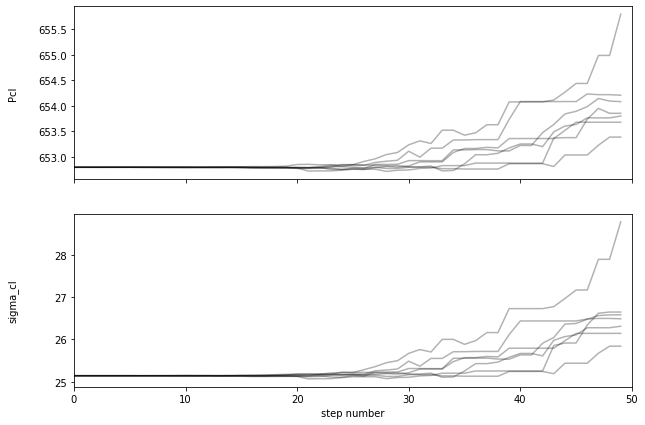

In [229]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()

labels = ["Pcl", "sigma_cl"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    # stiamo plottando come ascisse la posizione di un singolo camminatore (5000 posizioni) e sulle 
    # orodinate stiamo plottando i diversi cammiantori. Notiamo come tutti i camminatori convergono ad un numero
    ax.set_xlim(0, 50)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.ticklabel_format(useOffset=False)

axes[-1].set_xlabel("step number");